In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from getdist import MCSamples
from getdist import plots as getdist_plots
from scipy.interpolate import interp2d 

In [3]:
chain1 = np.random.multivariate_normal([0  ,0]  , [[1,0],[0,1]],2000)
chain2 = np.random.multivariate_normal([1.0,0]  , [[1,0],[0,1]],2000)
chain_list = [chain1, chain2]

In [4]:
samples_list = []
for chain in chain_list:
    samples_list.append( MCSamples(samples=chain, names=['x','y']) )

Removed no burn in
Removed no burn in


## functions for contour plot

In [5]:
def get_paler_colors(color, n_levels, pale_factor=None):
    # convert a color into an array of colors for used in contours
    color = matplotlib.colors.colorConverter.to_rgb(color)
    pale_factor = pale_factor or 0.6
    cols = [color]
    for _ in range(1, n_levels):
        cols = [[c * (1 - pale_factor) + pale_factor for c in cols[0]]] + cols
    return cols

def get_levels(x, y, prob, xscale='lin', yscale='lin', alphas=[0.68, 0.95]):
    prob_reshape = np.reshape(prob, -1)
    argsort = np.argsort(prob_reshape)
    prob_sorted = prob_reshape[argsort]
    x_sorted = np.reshape(x, -1)[argsort]
    y_sorted = np.reshape(y, -1)[argsort]
    
    dp = 1 # differential of parameter space = weight of parameter space
    if xscale == 'log':
        dp *= x_sorted
    if yscale == 'log':
        dp *= y_sorted
    
    cumsum = np.cumsum(prob_sorted*dp)
    cumsum /= cumsum[-1]
    
    levels = []
    for a in alphas:
        idx = np.argmax(cumsum[cumsum<1-a])
        l = prob_sorted[idx]
        levels.append(l)
    levels.append(max(prob_sorted))
    
    return sorted(levels)

def plot_contour(ax, x, y, zval, levels, color="C0",label=None):
    ax.contour(x, y, zval, levels=levels, colors=[color], alpha=1.0, linewidths=0.8)
    fcolor= get_paler_colors(color,len(levels)-1)
    ax.contourf(x, y, zval, levels=levels, colors=fcolor)
    ax.fill_betweenx(np.linspace(1.5, 2.0, 2), 1e-5, 1e-6, color=fcolor[-1], label=label)
    
def plot(ax, x, y, prob, color="C0", label=None, alphas=[0.68, 0.95]):
    x_mesh, y_mesh = np.meshgrid(x,y)
    levels = get_levels(x_mesh, y_mesh, prob, alphas=alphas)
    plot_contour(ax, x_mesh, y_mesh, prob, levels, color, label=label)

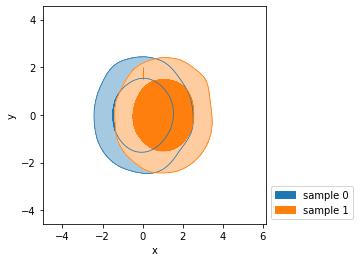

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_xlabel('x')
ax.set_ylabel('y')
for i, samples in enumerate(samples_list):
    density = samples.get2DDensity('x','y')
    plot(ax, density.x, density.y, density.P, color='C%i'%i, label='sample %d'%i)
ax.legend(loc='lower left', bbox_to_anchor=(1,0))

## jointing 2d posterior

In [7]:
def joint_posteriors(samples_list, xrange, yrange, xname='x', yname='y'):
    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    prob_jointed = np.ones((100, 100))
    
    for samples in samples_list:
        density = samples.get2DDensity(xname,yname)
        density_interp = interp2d(density.x, density.y, density.P, bounds_error=False, fill_value=0)
        prob_jointed *= density_interp(x,y)
    
    return x,y, prob_jointed

In [8]:
x,y,prob = joint_posteriors(samples_list, [-5,5], [-5,5])

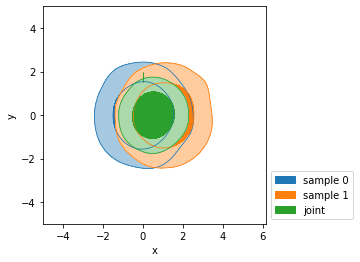

In [9]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_xlabel('x')
ax.set_ylabel('y')
for i, samples in enumerate(samples_list):
    density = samples.get2DDensity('x','y')
    plot(ax, density.x, density.y, density.P, color='C%d'%i, label='sample %d'%i)
plot(ax, x, y, prob, color='C%d'%(i+1), label='joint')
ax.legend(loc='lower left', bbox_to_anchor=(1,0))

## Jointing many!!!

In [10]:
centers = [[0,0],[0,0.1],[1,1],[-1,-1]]
for center in centers:
    chain = np.random.multivariate_normal(center, [[1,0],[0,1]],2000)
    chain_list.append(chain)

In [11]:
samples_list = []
for chain in chain_list:
    samples_list.append( MCSamples(samples=chain, names=['x','y']) )

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [12]:
x,y,prob = joint_posteriors(samples_list, [-5,5], [-5,5])

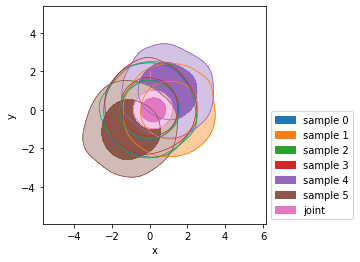

In [13]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_xlabel('x')
ax.set_ylabel('y')
for i, samples in enumerate(samples_list):
    density = samples.get2DDensity('x','y')
    plot(ax, density.x, density.y, density.P, color='C%d'%i, label='sample %d'%i)
plot(ax, x, y, prob, color='C%d'%(i+1), label='joint')
ax.legend(loc='lower left', bbox_to_anchor=(1,0))